# Coding Portion: Fashion Item Classification

* Dataset used: **Fashion MNIST** (28 x 28 grayscale images of fashion items)
* Dataset size: 60,000 training samples, 10,000 test samples
* Dataset source: https://github.com/zalandoresearch/fashion-mnist

#### Classification Labels:
Label | Description
:--- | ---
0 | T-shirt/top
1 | Trouser
2 | Pullover
3 | Dress
4 | Coat
5 | Sandal
6 | Shirt
7 | Sneaker
8 | Bag
9 | Ankle boot

### Step 1: Load in the Data

In [1]:
# Import Fashion-MNIST dataset from 'fashion' folder

from fashion import mnist_reader
X_train, y_train = mnist_reader.load_mnist('fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion', kind='t10k')

In [2]:
# Data exploration

print("Inputs shape is " + str(X_train.shape)) # 60,000 flattened image vectors (784 pixels long)
print("Input type is " + str(type(X_train)))
print("Labels:")
print(y_train)
print("Labels shape is" + str(y_train.shape)) # 60,000 labels
print("Labels type is " + str(type(y_train)))

Inputs shape is (60000, 784)
Input type is <class 'numpy.ndarray'>
Labels:
[9 0 0 ... 3 0 5]
Labels shape is(60000,)
Labels type is <class 'numpy.ndarray'>


In [3]:
# Convert numerical label to item description

def to_description(label):
    if label == 0: return "T-shirt/top"
    elif label == 1: return "Trouser"
    elif label == 2: return "Pullover"
    elif label == 3: return "Dress"
    elif label == 4: return "Coat"
    elif label == 5: return "Sandal"
    elif label == 6: return "Shirt"
    elif label == 7: return "Sneaker"
    elif label == 8: return "Bag"
    elif label == 9: return "Ankle boot"
    else: return "Label not found"

In [4]:
# Visualize the training examples

import matplotlib.pyplot as plt
import numpy as np

def visualize_sample(sample_num):
    flattened_vector = X_train[sample_num] # retrieve flattened vector
    image_2d = np.reshape(flattened_vector, (28, 28)) # reshape to 28 x 28 grayscale image array
    plt.imshow(image_2d, cmap = plt.get_cmap('gray')) # feed image into matplotlib
    print("Label: ", y_train[sample_num]) # print actual label
    print("Description: ", to_description(y_train[sample_num])) # print description
    plt.show()
    
    
visualize_sample(0)

Label:  9
Description:  Ankle boot


<Figure size 640x480 with 1 Axes>

### Step 2: Data Pre-Processing
1. Normalize the feature vectors/pixel values
2. Categorize the outputs

In [5]:
# Normalize the X_train and X_test dataset pixel values to between 0-1

# TODO: fill this in
    # Hint: maximum pixel value is still 255
X_train = X_train / 255.
X_test = X_test /  255.

In [6]:
import keras

# TODO: Use Keras to categorize the outputs ("one-hot" vectors)
    # Use variable names: y_train_categorical, y_test_categorical
    # hint: use the to_categorical() keras function to do this for you
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10)

# let's see result of categorizing the outputs
print(y_test_categorical[:5])

Using TensorFlow backend.


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### Step 3: Create and Compile Neural Network Model

In [7]:
from keras.layers import Dense, Activation
from keras.models import Sequential

model = Sequential()

# TODO: fill this in
# Feel free to experiment with different number of layers, number of neurons, activation functions, etc.
    # Activation functions: https://keras.io/activations/
    # Declaring Keras layers: https://keras.io/layers/core/
    
### Add 1st layer here. Remember that the input_dimension should match up with the input vector dimension!
model.add(Dense(units=64, input_dim=784, activation='relu'))
### Add 2nd layer here.
model.add(Dense(units=32, activation='relu'))

# Add final layer here. Make sure the last layer matches up the output vector dimension
    # Hint: use softmax again to output classification probabilities
model.add(Dense(units=10, activation='softmax'))

In [8]:
# TODO: Compile model
    # Loss: categorical cross-entropy
    # Optimizer: stochastic gradient descent
        # Or: experiment with other optimizers? https://keras.io/optimizers/
    # Metrics: accuracy
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Import relevant libraries
from keras_tqdm import TQDMNotebookCallback # TQDM: progress bars
from keras.callbacks import TensorBoard # Tensorboard: training plots
    
# Clear any existing Tensorboard logs
import shutil
shutil.rmtree('./logs', ignore_errors=True)

# Set up callback links to refer back to during training
tensorboard = TensorBoard()
callbacks_list = [TQDMNotebookCallback(), tensorboard]

In [17]:
# TODO: Fit model to training data
    # Reserve some fraction of training data as validation data
    # Pick number of epochs
    # Pick a batch_size
    # Pass in relevant callbacks_list from above
    
model.fit(X_test, y_test_categorical, epochs=10, batch_size=16)
    
    

Epoch 1/10
10000/10000 [==============================] - 1s 92us/step - loss: 1.1049 - acc: 0.6194
Epoch 2/10
10000/10000 [==============================] - 1s 68us/step - loss: 0.7017 - acc: 0.7490
Epoch 3/10
10000/10000 [==============================] - 1s 69us/step - loss: 0.6159 - acc: 0.7816
Epoch 4/10
10000/10000 [==============================] - 1s 68us/step - loss: 0.5746 - acc: 0.7979
Epoch 5/10
10000/10000 [==============================] - 1s 68us/step - loss: 0.5437 - acc: 0.8095
Epoch 6/10
10000/10000 [==============================] - 1s 68us/step - loss: 0.5199 - acc: 0.8141
Epoch 7/10
10000/10000 [==============================] - 1s 68us/step - loss: 0.5074 - acc: 0.8202
Epoch 8/10
10000/10000 [==============================] - 1s 68us/step - loss: 0.4888 - acc: 0.8263
Epoch 9/10
10000/10000 [==============================] - 1s 66us/step - loss: 0.4757 - acc: 0.8327
Epoch 10/10
10000/10000 [==============================] - 1s 68us/step - loss: 0.4660 - acc: 0.8387

### Step 4: Evaluate the Model

In [18]:
# TODO: Evaluate model on test data

# Use model.evaluate()
# Also: open up the training logs in Tensorboard to check validation_loss for overfitting
loss_and_metrics = model.evaluate(X_test, y_test_categorical, batch_size=128)

print(loss_and_metrics)

10000/10000 [==============================] - 0s 11us/step
[0.4477718640327454, 0.835]


In [19]:
# Final predictions testing

import numpy as np

# Compare actual class to predicted class
def visualize_test_sample(test_sample_num):
    
    # Display actual image & label
    flattened_vector = X_test[test_sample_num] # retrieve flattened vector
    image_2d = np.reshape(flattened_vector, (28, 28)) # reshape to 28 x 28 grayscale image array
    plt.imshow(image_2d, cmap = plt.get_cmap('gray')) # feed image into matplotlib
    print("Actual Label: ", y_test[test_sample_num]) # print actual label
    print("Actual Description: ", to_description(y_test[test_sample_num])) # print description
    plt.show()
    
    # Print predicted label
    test_sample = np.expand_dims(X_test[test_sample_num], axis=0) # pick out a one-sample "batch" to feed into model
    predicted_scores = model.predict(test_sample) # outputted probabilities vector
    print("Outputted scores: ", predicted_scores) # print predicted scores

    predicted_class = np.argmax(predicted_scores) # pick the class with highest probability --> final prediction
    print("Predicted Label: ", predicted_class) # print predicted classification
    print("Predicted Description: ", to_description(predicted_class)) # print predicted label description

Actual Label:  2
Actual Description:  Pullover


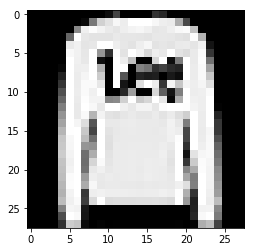

Outputted scores:  [[4.2946113e-04 6.2225780e-07 9.3040347e-01 1.0204030e-04 3.6954754e-03
  1.9749735e-10 6.5358356e-02 3.7609216e-15 1.0587552e-05 1.1980647e-10]]
Predicted Label:  2
Predicted Description:  Pullover


In [20]:
visualize_test_sample(1
                     )